Importing Libraries

In [437]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np
import seaborn as sns
import time 
import os  
import bs4
from bs4 import BeautifulSoup
import scipy as sc
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import requests
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

Building our initial table

In [11]:
CarCompany=[] #
TestedModel=[] #
VehicleType=[] #
YearOfPublication=[] #
KerbWeight=[]
Stars=[]
AEBCar2Car=[]
SpeedAssistance=[]
LaneAssistSystem=[]
AdultOccupantR=[] #Adult Occupant Rating
ChildOccupantR=[] #Child Occupant Rating
VulnerableRoadUsersR=[] #Vulnerable Road Users Rating
SafetyAssistR=[] #Safety Assist Rating
CarClass=[]

CarSafetyTests=[CarCompany,TestedModel,VehicleType,CarClass,YearOfPublication,KerbWeight,Stars,AEBCar2Car,SpeedAssistance,LaneAssistSystem,AdultOccupantR,ChildOccupantR,VulnerableRoadUsersR,SafetyAssistR]


הרכשה מאתר ראשון
by using selenium

In [ ]:
URL1 = 'https://www.ancap.com.au/safety-ratings' #הרכשה
browser1 = webdriver.Chrome()
browser1.get(URL1)

for j in range(19): #pages
    l=0
    for k in range(48): #cars
        browser1.get(URL1)
        time.sleep(3)
        # מציאת האלמנט עם הקישור לכל רכב ולחיצה עליו על מנת להכנס לדאטה שלו
        try:
            page = browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[2]/div['+str(k+1)+']/a')
        except StaleElementReferenceException:
            page = browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[4]/div['+str(l+1)+']/a')
            l=l+1
        except NoSuchElementException:
            try:
                page = browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[4]/div['+str(l+1)+']/a')
                l=l+1
            except NoSuchElementException:
                break
        time.sleep(5)
        page.click()
        time.sleep(10)
        try:
            car_name_json=browser1.find_element(By.TAG_NAME, 'h1')
            TestedModel.append(car_name_json.text)
        except NoSuchElementException:
            TestedModel.append(None)
        try:
            car_company_json=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[2]/div[1]/div/span/img')
            txt_carcomp=car_company_json.get_attribute("alt")
            CarCompany.append(txt_carcomp)
        except NoSuchElementException:
            CarCompany.append(None)
        try:
            vehicle_type=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[2]/div[3]/div[1]/div[4]/span[2]/p')
            VehicleType.append(vehicle_type.text)
        except NoSuchElementException:
            try:
                vehicle_type=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[2]/div[4]/div[1]/div[4]/span[2]/p')
                VehicleType.append(vehicle_type.text)
            except NoSuchElementException:
                VehicleType.append(None)
        
        try:    
            year_json=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[2]/div[3]/div[1]/div[7]/span[2]/p')
            YearOfPublication.append(year_json.text)
        except NoSuchElementException:
            try:
                year_json=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[2]/div[4]/div[1]/div[7]/span[2]/p')
                YearOfPublication.append(year_json.text)
            except NoSuchElementException:
                YearOfPublication.append(None)
            
        try:    
            stars_json=browser1.find_elements(By.XPATH, '//*[contains(@class, "w-4 h-4 mt-0.5 opacity-20")]')
            Stars.append(str(5-len(stars_json)))
        except NoSuchElementException:
            Stars.append(None)
        try:
            adult_json=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[3]/div[2]/div[1]/div/div[2]/div[2]')
            AdultOccupantR.append(adult_json.text)
        except NoSuchElementException:
            AdultOccupantR.append(None)
        try:
            child_json=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[3]/div[2]/div[2]/div/div[2]/div[2]')
            ChildOccupantR.append(child_json.text)
        except NoSuchElementException:
            ChildOccupantR.append(None)
        try:
            road_user_json=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[3]/div[2]/div[3]/div/div[2]/div[2]')
            VulnerableRoadUsersR.append(road_user_json.text)
        except NoSuchElementException:
            VulnerableRoadUsersR.append(None)
        try:
            safety_assist_json=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div/div[2]/div[2]')
            SafetyAssistR.append(safety_assist_json.text)
        except NoSuchElementException:
            SafetyAssistR.append(None)
        KerbWeight.append(None)
        CarClass.append(None)
        browser1.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        try:
            lss_AND_aeb=browser1.find_elements(By.XPATH, '//*[contains(@viewBox, "0 0 16 16")]')
        except NoSuchElementException:
            LaneAssistSystem.append('0')
            AEBCar2Car.append('0')
        try:
            lss_rate=lss_AND_aeb[5].get_attribute('class')
            if(lss_rate=='w-full h-full text-alt-green alt-green'):
                LaneAssistSystem.append('1')
            else:
                LaneAssistSystem.append('0')
        except IndexError:
            LaneAssistSystem.append('0')
            
        try:    
            aeb_rate=lss_AND_aeb[1].get_attribute('class')
            if(aeb_rate=='w-full h-full text-alt-green alt-green'):
                AEBCar2Car.append('1')
            else:
                AEBCar2Car.append('0')
        except IndexError:
            AEBCar2Car.append('0')

        try:
            speed_details=browser1.find_element(By.XPATH, "//*[text()='Details']")
            time.sleep(3)
            browser1.execute_script("arguments[0].click();", speed_details)
            time.sleep(3)
            sp=browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[3]/div[2]/div[4]/div/div[4]/div')
            sp1=sp.find_element(By.XPATH , "//*[text()='Speed Assistance System']")
            if(sp1.text=='Speed Assistance System'):
                SpeedAssistance.append('1')
            else:
                SpeedAssistance.append('0') 
        except NoSuchElementException:   
            SpeedAssistance.append('0') 
         
        
    browser1.get(URL1)
    time.sleep(3)
    if(j<4):
        new_page = browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[3]/div/div[2]/div['+str(j+2)+']')
    else:
        new_page = browser1.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div[5]/div/div[2]/div[5]')
    time.sleep(5)
    browser1.execute_script("arguments[0].click();", new_page)
    # new_page.click()
    time.sleep(5)
    URL1 = browser1.current_url

    
browser1.close()


converting the data to dataframe and csv

In [ ]:
Table1df = pd.DataFrame(Table1, index=['CarCompany','TestedModel','VehicleType','CarClass','YearOfPublication','KerbWeight','Stars','AEBCar2Car','SpeedAssistance','LaneAssistSystem','AdultOccupantR','ChildOccupantR','VulnerableRoadUsersR','SafetyAssistR'])
Table1dfT=Table1df.T

Table1dfT.to_csv('Table1.csv', index=False)

הרכשה מאתר שני 
by using selenium

In [94]:
URL2 = 'https://www.euroncap.com/en/ratings-rewards/latest-safety-ratings/#?selectedMake=0&selectedMakeName=Select%20a%20make&selectedModel=0&selectedStar=&includeFullSafetyPackage=true&includeStandardSafetyPackage=true&selectedModelName=All&selectedProtocols=45155,41776,40302,34803,30636,26061,24370,-1&selectedClasses=1202,1199,1201,1196,1205,1203,1198,1179,40250,1197,1204,1180,34736,44997&allClasses=true&allProtocols=true&allDriverAssistanceTechnologies=false&selectedDriverAssistanceTechnologies=&thirdRowFitment=false'
browser2 = webdriver.Chrome()
browser2.get(URL2)
time.sleep(15)
carlist=browser2.find_elements(By.XPATH, "//*[contains(@class, 'rating-table-row ng-scope')]")

for a in range(len(carlist)):
    time.sleep(7)
    page2=carlist[a].find_element(By.TAG_NAME, 'a')
    time.sleep(3)
    browser2.execute_script("arguments[0].scrollIntoView();", page2)
    
    try:
        stars_json = page2.find_element(By.XPATH, "//*[contains(@class, 'stars')]")
        stars_content=stars_json.find_element(By.TAG_NAME, "img")
        stars_num=stars_content.get_attribute('alt')
        Stars.append(stars_num)
    except NoSuchElementException:
        Stars.append(None)

    browser2.execute_script("arguments[0].click();", page2)
    time.sleep(3)
    
    try:
        car_name_json=browser2.find_element(By.XPATH, "//*[contains(@class, 'car-name')]")
        TestedModel.append(car_name_json.text)
        string_carname=car_name_json.text.split()
        CarCompany.append(string_carname[0])
    except NoSuchElementException:
        TestedModel.append(None)
        CarCompany.append(None)
    except IndexError:
        TestedModel.append(None)
        CarCompany.append(None)    
    try:    
        vehicle_type = browser2.find_element(By.XPATH, '//*[@id="tab1"]/div/p[2]/span[2]')
        VehicleType.append(vehicle_type.text)
    except NoSuchElementException:
        VehicleType.append(None)

    try:
        car_class_json=browser2.find_element(By.XPATH, '//*[@id="tab1"]/div/p[6]/span[2]')
        CarClass.append(car_class_json.text)
    except NoSuchElementException:
        try:
            car_class_json = browser2.find_element(By.XPATH, "//*[contains(@class, 'car-class')]")
            CarClass.append(car_class_json.text)
        except NoSuchElementException:
            CarClass.append(None)    
    try:
        year_json = browser2.find_element(By.XPATH, '//*[@id="tab1"]/div/p[3]/span[2]')
        YearOfPublication.append(year_json.text)
    except NoSuchElementException:
        try:
            year_json = browser2.find_element(By.XPATH, "//*[contains(@class, 'car-name')]")
            year_txt=year_json.text
            start = year_txt.index("(") + 1
            end = year_txt.index(")")
            result = year_txt[start:end]
            YearOfPublication.append(result)
        except NoSuchElementException:
            YearOfPublication.append(None)
        
    try:    
        adult_json = browser2.find_element(By.XPATH, '//*[@id="site-canvas"]/div[4]/div/div[2]/div[8]/ul/li[1]/div[2]/div')
        AdultOccupantR.append(adult_json.text)
    except NoSuchElementException: 
        try:
            adult_json = browser2.find_element(By.XPATH, '//*[@id="site-canvas"]/div[4]/div/div[2]/div[7]/ul/li[1]/div[2]/div')
            AdultOccupantR.append(adult_json.text)
        except NoSuchElementException:
            try:
                adult_json = browser2.find_element(By.XPATH, "//*[contains(@class, 'details-trigger adult-occupant starless starless-1-3')]")
                adult_json1=adult_json.find_element(By.XPATH, "//*[contains(@class, 'stars')]")
                adult_json2=adult_json1.find_element(By.TAG_NAME, 'img')
                adult_json_text=adult_json2.get_attribute('data-src')
                if(adult_json_text=='/gfx/stars5-yellow-109x18.png'):
                    AdultOccupantR.append('100%')
                elif(adult_json_text=='/gfx/stars4-yellow-109x18.png'):
                    AdultOccupantR.append('80%')
                elif(adult_json_text=='/gfx/stars3-yellow-109x18.png'):
                    AdultOccupantR.append('60%')
                elif(adult_json_text=='/gfx/stars2-yellow-109x18.png'):
                    AdultOccupantR.append('40%')
                elif(adult_json_text=='/gfx/stars1-yellow-109x18.png'):
                    AdultOccupantR.append('20%')
                else:
                    AdultOccupantR.append(None)
            except NoSuchElementException:
                AdultOccupantR.append(None)
                
    try:    
        child_json=browser2.find_element(By.XPATH,'//*[@id="site-canvas"]/div[4]/div/div[2]/div[8]/ul/li[2]/div[2]/div')
        ChildOccupantR.append(child_json.text)
    except NoSuchElementException:
        try:
            child_json = browser2.find_element(By.XPATH, '//*[@id="site-canvas"]/div[4]/div/div[2]/div[7]/ul/li[2]/div[2]/div')
            ChildOccupantR.append(child_json.text)
        except NoSuchElementException:
            try:
                child_json = browser2.find_element(By.XPATH, "//*[contains(@class, 'details-trigger child-occupant starless starless-1-3')]")
                child_json1=child_json.find_element(By.XPATH, "//*[contains(@class, 'stars')]")
                child_json2=child_json1.find_element(By.TAG_NAME, 'img')
                child_json_text=child_json2.get_attribute('data-src')
                if(child_json_text=='/gfx/stars5-blue-109x18.png'):
                    ChildOccupantR.append('100%')
                elif(child_json_text=='/gfx/stars4-blue-109x18.png'):
                    ChildOccupantR.append('80%')
                elif(child_json_text=='/gfx/stars3-blue-109x18.png'):
                    ChildOccupantR.append('60%')
                elif(child_json_text=='/gfx/stars2-blue-109x18.png'):
                    ChildOccupantR.append('40%')
                elif(child_json_text=='/gfx/stars1-blue-109x18.png'):
                    ChildOccupantR.append('20%')
                else:
                    ChildOccupantR.append(None)
            except NoSuchElementException:
                ChildOccupantR.append(None)

    try:    
        road_user_json=browser2.find_element(By.XPATH, '//*[@id="site-canvas"]/div[4]/div/div[2]/div[8]/ul/li[3]/div[2]/div')
        VulnerableRoadUsersR.append(road_user_json.text)
    except NoSuchElementException:
        try:
            road_user_json = browser2.find_element(By.XPATH, '//*[@id="site-canvas"]/div[4]/div/div[2]/div[7]/ul/li[3]/div[2]/div')
            VulnerableRoadUsersR.append(road_user_json.text)
        except NoSuchElementException:
            try:
                road_user_json = browser2.find_element(By.XPATH, "//*[contains(@class, 'details-trigger pedestrian starless starless-1-3')]")
                road_user_json1=road_user_json.find_element(By.XPATH, "//*[contains(@class, 'stars')]")
                road_user_json2=road_user_json1.find_element(By.TAG_NAME, 'img')
                road_user_json_text=road_user_json2.get_attribute('data-src')
                if(road_user_json_text=='/gfx/stars5-green-109x18.png'):
                    VulnerableRoadUsersR.append('100%')
                elif(road_user_json_text=='/gfx/stars4-green-109x18.png'):
                    VulnerableRoadUsersR.append('80%')
                elif(road_user_json_text=='/gfx/stars3-green-109x18.png'):
                    VulnerableRoadUsersR.append('60%')
                elif(road_user_json_text=='/gfx/stars2-green-109x18.png'):
                    VulnerableRoadUsersR.append('40%')
                elif(road_user_json_text=='/gfx/stars1-green-109x18.png'):
                    VulnerableRoadUsersR.append('20%')
                else:
                    VulnerableRoadUsersR.append(None)
            except NoSuchElementException:
                VulnerableRoadUsersR.append(None)

    try:    
        safety_assist_json=browser2.find_element(By.XPATH, '//*[@id="site-canvas"]/div[4]/div/div[2]/div[8]/ul/li[4]/div[2]/div')
        SafetyAssistR.append(safety_assist_json.text)
    except NoSuchElementException:
        SafetyAssistR.append(None)
        
    try:
        weight_json=browser2.find_element(By.XPATH, '//*[@id="tab1"]/div/p[4]/span[2]')
        KerbWeight.append(weight_json.text)
    except NoSuchElementException:    
        KerbWeight.append(None)
    try:
        safety_page=browser2.find_element(By.XPATH, '//*[@id="car-rating-details"]/ul/li[2]')
        browser2.execute_script("arguments[0].click();", safety_page)
        time.sleep(3)
        try:
            AEB_json=safety_page.find_element(By.XPATH, '//*[@id="tab2"]/div[2]/div[2]/div[4]/div[2]/img')
            AEB_content = AEB_json.get_attribute('data-src')
            if ((AEB_content == '/gfx/picto_standard.svg') | (AEB_content == '/gfx/picto_safety.svg')):
                AEBCar2Car.append('1')
            elif ((AEB_content == '/gfx/picto_not-available.svg') |(AEB_content == '/gfx/picto_not-safety.svg') |(AEB_content == '/gfx/picto_not-applicable.svg')):
                AEBCar2Car.append('0')
        except NoSuchElementException: 
            AEBCar2Car.append('0')
        try:        
            speed_json=safety_page.find_element(By.XPATH, '//*[@id="tab2"]/div[2]/div[2]/div[5]/div[2]/img')
            speed_content=speed_json.get_attribute('data-src')
            if ((speed_content == '/gfx/picto_standard.svg') | (speed_content == '/gfx/picto_safety.svg')):
                SpeedAssistance.append('1')
            elif ((speed_content == '/gfx/picto_not-available.svg') |(speed_content == '/gfx/picto_not-safety.svg') |(speed_content == '/gfx/picto_not-applicable.svg')):
                SpeedAssistance.append('0')
        except NoSuchElementException:
            SpeedAssistance.append('0')
        try:    
            lane_json=safety_page.find_element(By.XPATH, '//*[@id="tab2"]/div[2]/div[2]/div[6]/div[2]/img')
            lane_content = lane_json.get_attribute('data-src')
            if ((lane_content == '/gfx/picto_standard.svg') | (lane_content == '/gfx/picto_safety.svg')):
                LaneAssistSystem.append('1')
            elif ((lane_content == '/gfx/picto_not-available.svg') | (lane_content == '/gfx/picto_not-safety.svg') | (lane_content == '/gfx/picto_not-applicable.svg')):
                LaneAssistSystem.append('0')
        except NoSuchElementException:        
            LaneAssistSystem.append('0')
    except NoSuchElementException:
        AEBCar2Car.append('0')
        SpeedAssistance.append('0')
        LaneAssistSystem.append('0')
       
    browser2.back()


browser2.close()

converting the data to dataframe and csv

In [14]:
Table3df = pd.DataFrame(Table3, index=['CarCompany','TestedModel','VehicleType','CarClass','YearOfPublication','KerbWeight','Stars','AEBCar2Car','SpeedAssistance','LaneAssistSystem','AdultOccupantR','ChildOccupantR','VulnerableRoadUsersR','SafetyAssistR'])
Table3dfT=Table3df.T

Table3dfT.to_csv('Table3.csv', index=False)

הרכשה מאתר שלישי
by using selenium

In [97]:
URL3 = 'https://www.iihs.org/ratings/top-safety-picks/'
browser3 = webdriver.Chrome()
browser3.get(URL3)
URLS_BY_YEAR=[]
years=[2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]

for y in range(17):
    URLS_BY_YEAR.append(URL3+str(years[y]))
  

for year_url in range(len(years)):
    browser3.get(URLS_BY_YEAR[year_url])
    time.sleep(10)
    list_of_cars = WebDriverWait(browser3, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'card')))
    #list_of_cars=browser3.find_elements(By.CLASS_NAME, 'card')

    for car in range(len(list_of_cars)):
        time.sleep(10)
        elemnt=list_of_cars[car]
        time.sleep(7)
        #WebDriverWait(browser3, 10).until(EC.element_to_be_clickable(elemnt))
        browser3.execute_script("arguments[0].scrollIntoView();", elemnt)
        browser3.execute_script("arguments[0].click();", elemnt)
        #elemnt.click()
        time.sleep(3)
        try:
            list_ratings=browser3.find_elements(By.XPATH,'//*[contains(@class, "overall-rating")]' )
            
            adult_json = list_ratings[0].find_element(By.XPATH, '//*[contains(@class, "is-good is-gamp tag")]')
            if(adult_json.get_attribute('aria-label')=='Good'):
                AdultOccupantR.append('90%')
            elif(adult_json.get_attribute('aria-label')=='Acceptable'):
                AdultOccupantR.append('75%')
            elif(adult_json.get_attribute('aria-label')=='Marginal'):
                AdultOccupantR.append('60%')
            elif(adult_json.get_attribute('aria-label')=='Poor'):
                AdultOccupantR.append('45%')
                
            stars_json = list_ratings[3].find_element(By.XPATH, '//*[contains(@class, "is-good is-gamp tag")]')
            if(stars_json.get_attribute('aria-label') == 'Good'):
                Stars.append('5')
            elif (stars_json.get_attribute('aria-label')=='Acceptable'):
                Stars.append('4')
            elif (stars_json.get_attribute('aria-label')== 'Marginal'):
                Stars.append('3')
            elif (stars_json.get_attribute('aria-label')=='Poor'):
                Stars.append('2')    
        except NoSuchElementException: 
            AdultOccupantR.append(None)
            Stars.append(None)   
        try:    
            sup_rating=browser3.find_elements(By.XPATH,'//*[contains(@class, "fcp-superior")]' )
            if(sup_rating[1].text=='Superior'):
                VulnerableRoadUsersR.append('Superior')
            elif(sup_rating[1].text=='Advanced'):
                VulnerableRoadUsersR.append('Advanced')
            elif(sup_rating[1].text=='Basic'):
                VulnerableRoadUsersR.append('Basic')
            else:
                VulnerableRoadUsersR.append(None) 
        except NoSuchElementException:  
            VulnerableRoadUsersR.append(None) 
        except IndexError:
            VulnerableRoadUsersR.append(None) 
            
        try:    
            car_name_json=browser3.find_element(By.TAG_NAME, 'h1')
            list_year=car_name_json.text.split()
            YearOfPublication.append(list_year[0])
            try:
                TestedModel.append(list_year[1]+' '+list_year[2]+' '+list_year[3])
                CarCompany.append(list_year[1])
            except IndexError:
                try:
                    TestedModel.append(list_year[1]+' '+list_year[2])
                    CarCompany.append(list_year[1])
                except IndexError:
                    try:
                        TestedModel.append(list_year[1])
                        CarCompany.append(list_year[1])
                    except IndexError:    
                        TestedModel.append(list_year[0])
                        CarCompany.append(list_year[0])
        except NoSuchElementException: 
            YearOfPublication.append(None)
            TestedModel.append(None)
            CarCompany.append(None)
        try: 
            vehicle_type = browser3.find_element(By.TAG_NAME, 'h2')
            list_vehicle_type=vehicle_type.text.split('/')
            VehicleType.append(list_vehicle_type[0])
            try:    
                CarClass.append(list_vehicle_type[1])
            except IndexError:
                CarClass.append(list_vehicle_type[0])
        except NoSuchElementException: 
            VehicleType.append(None)
            CarClass.append(None)
        try:
            Car_strength=browser3.find_element(By.ID, 'roof-strength')
            Car_Kerb_Weight=Car_strength.find_element(By.XPATH, "//*[contains(text(), 'lbs')]")
            KerbWeight.append(Car_Kerb_Weight.text)
        except NoSuchElementException:     
            KerbWeight.append(None)

        AEBCar2Car.append(None)
        SpeedAssistance.append(None)
        LaneAssistSystem.append(None)
        ChildOccupantR.append(None)
        SafetyAssistR.append(None)
        browser3.back()
browser3.close()


converting the data to dataframe and csv

In [ ]:
Table2df = pd.DataFrame(Table2, index=['CarCompany','TestedModel','VehicleType','CarClass','YearOfPublication','KerbWeight','Stars','AEBCar2Car','SpeedAssistance','LaneAssistSystem','AdultOccupantR','ChildOccupantR','VulnerableRoadUsersR','SafetyAssistR'])
Table2dfT=Table2df.T

Table2dfT.to_csv('Table2.csv', index=False)

משיכת כל הנתונים שלנו מטבלה מאוחדת

In [131]:
All_data = pd.read_csv('all_data.csv')
All_data.head()
print(All_data)

     CarCompany           TestedModel         VehicleType            CarClass  \
0        Aiways             Aiways U5        - 5 door SUV  Small Off-Road 4x4   
1          Alfa     Alfa Romeo Tonale        - 5 door SUV      Small Off-Road   
2          Alfa  Alfa Romeo Giulietta  - 5 door hatchback    Small Family Car   
3          Alfa    Alfa Romeo Stelvio        - 5 door SUV      Large Off-Road   
4          Alfa     Alfa Romeo Giulia     - 4 door saloon    Large Family Car   
...         ...                   ...                 ...                 ...   
3391      Volvo      Volvo S80 (2000)                 NaN           Executive   
3392      Volvo      Volvo S70 (1998)                 NaN           Executive   
3393      Volvo      Volvo S40 (1997)                 NaN    Large Family Car   
3394        WEY         WEY Coffee 02        - 5 door SUV      Small Off-Road   
3395        WEY         WEY Coffee 01        - 5 door SUV      Large Off-Road   

     YearOfPublication Kerb

printing the data before cleaning

In [310]:
pd.concat([All_data.head(), All_data.tail()])

,CarCompany,TestedModel,VehicleType,CarClass,YearOfPublication,KerbWeight,Stars,AEBCar2Car,SpeedAssistance,LaneAssistSystem,AdultOccupantR,ChildOccupantR,VulnerableRoadUsersR,SafetyAssistR
0,Aiways,Aiways U5,- 5 door SUV,Small Off-Road 4x4,2019,1750kg,5,1.0,1.0,1.0,73%,70%,45%,55%
1,Alfa,Alfa Romeo Tonale,- 5 door SUV,Small Off-Road,2022,1626kg,5,1.0,1.0,1.0,83%,85%,67%,85%
2,Alfa,Alfa Romeo Giulietta,- 5 door hatchback,Small Family Car,2017,1355kg,5,0.0,0.0,0.0,72%,56%,59%,25%
3,Alfa,Alfa Romeo Stelvio,- 5 door SUV,Large Off-Road,2017,1745kg,5,1.0,1.0,1.0,97%,84%,71%,60%
4,Alfa,Alfa Romeo Giulia,- 4 door saloon,Large Family Car,2016,1449kg,5,1.0,1.0,1.0,98%,81%,69%,60%
3391,Volvo,Volvo S80 (2000),NaN,Executive,2000,NaN,5,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3392,Volvo,Volvo S70 (1998),NaN,Executive,1998,NaN,5,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3393,Volvo,Volvo S40 (1997),NaN,Large Family Car,1997,NaN,5,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3394,WEY,WEY Coffee 02,- 5 door SUV,Small Off-Road,2022,2100kg,5,1.0,1.0,1.0,94%,87%,73%,93%
3395,WEY,WEY Coffee 01,- 5 door SUV,Large Off-Road,2022,2365kg,5,1.0,1.0,1.0,91%,87%,79%,94%


טיפול ראשוני בנתונים

In [132]:
All_data_copy=All_data.copy()
All_data_copy.drop_duplicates() #erase duplicated rows

All_data_copy['AEBCar2Car'].fillna(0, inplace=True) #fill null values with 0 (only on boolean data)
All_data_copy['SpeedAssistance'].fillna(0, inplace=True)
All_data_copy['LaneAssistSystem'].fillna(0, inplace=True)

All_data_copy = All_data_copy[All_data_copy.YearOfPublication!= 'TBA'] #erase rows with no year
All_data_copy = All_data_copy[All_data_copy.YearOfPublication!= 'Expired']

# earase raws that still contains null data
All_data_copy.dropna(axis=0, subset=['AEBCar2Car','SpeedAssistance','LaneAssistSystem','AdultOccupantR','ChildOccupantR','VulnerableRoadUsersR','SafetyAssistR'], inplace=True)
All_data_copy = All_data_copy.reset_index(drop=True) # resets the indexes after the data cleaning

for i in range(len(All_data_copy)):   # converting the str precent values to numeric  
    All_data_copy.loc[i, 'AdultOccupantR'] =int(All_data_copy.loc[i,'AdultOccupantR'].strip('%'))
    All_data_copy.loc[i, 'ChildOccupantR'] =int(All_data_copy.loc[i,'ChildOccupantR'].strip('%'))
    All_data_copy.loc[i, 'VulnerableRoadUsersR'] =int(All_data_copy.loc[i,'VulnerableRoadUsersR'].strip('%'))    
    All_data_copy.loc[i, 'SafetyAssistR'] =int(All_data_copy.loc[i,'SafetyAssistR'].strip('%'))
    All_data_copy.loc[i, 'YearOfPublication']=int(All_data_copy.loc[i, 'YearOfPublication']) # converting the years to numeric

    
    
print(All_data_copy)
All_data_copy.info()



     CarCompany           TestedModel         VehicleType            CarClass  \
0        Aiways             Aiways U5        - 5 door SUV  Small Off-Road 4x4   
1          Alfa     Alfa Romeo Tonale        - 5 door SUV      Small Off-Road   
2          Alfa  Alfa Romeo Giulietta  - 5 door hatchback    Small Family Car   
3          Alfa    Alfa Romeo Stelvio        - 5 door SUV      Large Off-Road   
4          Alfa     Alfa Romeo Giulia     - 4 door saloon    Large Family Car   
...         ...                   ...                 ...                 ...   
1300      Volvo             Volvo C30  - 3 door hatchback    Small Family Car   
1301      Volvo             Volvo V70     - 5 door estate    Large Family Car   
1302      Volvo            Volvo XC60        - 5 door SUV      Small Off-Road   
1303        WEY         WEY Coffee 02        - 5 door SUV      Small Off-Road   
1304        WEY         WEY Coffee 01        - 5 door SUV      Large Off-Road   

     YearOfPublication Kerb

printing the data after cleaning

In [463]:
pd.concat([All_data_copy.head(), All_data_copy.tail()])

,CarCompany,TestedModel,VehicleType,CarClass,YearOfPublication,KerbWeight,Stars,AEBCar2Car,SpeedAssistance,LaneAssistSystem,AdultOccupantR,ChildOccupantR,VulnerableRoadUsersR,SafetyAssistR,mean_ratings,sum_of_cols,CarCompanyCode
0,Aiways,Aiways U5,- 5 door SUV,Small Off-Road 4x4,2019,1750kg,5,1.0,1.0,1.0,73,70,45,55,60.75,3.0,0
1,Alfa,Alfa Romeo Tonale,- 5 door SUV,Small Off-Road,2022,1626kg,5,1.0,1.0,1.0,83,85,67,85,80.00,3.0,1
2,Alfa,Alfa Romeo Giulietta,- 5 door hatchback,Small Family Car,2017,1355kg,5,0.0,0.0,0.0,72,56,59,25,53.00,0.0,1
3,Alfa,Alfa Romeo Stelvio,- 5 door SUV,Large Off-Road,2017,1745kg,5,1.0,1.0,1.0,97,84,71,60,78.00,3.0,1
4,Alfa,Alfa Romeo Giulia,- 4 door saloon,Large Family Car,2016,1449kg,5,1.0,1.0,1.0,98,81,69,60,77.00,3.0,1
1300,Volvo,Volvo C30,- 3 door hatchback,Small Family Car,2009,1352kg,5,0.0,0.0,0.0,91,78,26,65,65.00,0.0,64
1301,Volvo,Volvo V70,- 5 door estate,Large Family Car,2009,1725kg,5,0.0,0.0,0.0,88,84,43,88,75.75,0.0,64
1302,Volvo,Volvo XC60,- 5 door SUV,Small Off-Road,2009,1850kg,5,0.0,0.0,0.0,94,79,48,64,71.25,0.0,64
1303,WEY,WEY Coffee 02,- 5 door SUV,Small Off-Road,2022,2100kg,5,1.0,1.0,1.0,94,87,73,93,86.75,3.0,65
1304,WEY,WEY Coffee 01,- 5 door SUV,Large Off-Road,2022,2365kg,5,1.0,1.0,1.0,91,87,79,94,87.75,3.0,65


In [449]:
# making new tabel for the mean value of the precent values
mean_ratings = All_data_copy[['AdultOccupantR', 'ChildOccupantR', 'VulnerableRoadUsersR', 'SafetyAssistR']].mean(axis=1)
All_data_copy = All_data_copy.assign(mean_ratings=mean_ratings) 
# making new tabel for the sum value of the boolean values
sum_of_cols = All_data_copy[['AEBCar2Car', 'SpeedAssistance', 'LaneAssistSystem']].sum(axis=1)
All_data_copy = All_data_copy.assign(sum_of_cols=sum_of_cols)


print(All_data_copy)
All_data_copy.info()

     CarCompany           TestedModel         VehicleType            CarClass  \
0        Aiways             Aiways U5        - 5 door SUV  Small Off-Road 4x4   
1          Alfa     Alfa Romeo Tonale        - 5 door SUV      Small Off-Road   
2          Alfa  Alfa Romeo Giulietta  - 5 door hatchback    Small Family Car   
3          Alfa    Alfa Romeo Stelvio        - 5 door SUV      Large Off-Road   
4          Alfa     Alfa Romeo Giulia     - 4 door saloon    Large Family Car   
...         ...                   ...                 ...                 ...   
1300      Volvo             Volvo C30  - 3 door hatchback    Small Family Car   
1301      Volvo             Volvo V70     - 5 door estate    Large Family Car   
1302      Volvo            Volvo XC60        - 5 door SUV      Small Off-Road   
1303        WEY         WEY Coffee 02        - 5 door SUV      Small Off-Road   
1304        WEY         WEY Coffee 01        - 5 door SUV      Large Off-Road   

     YearOfPublication Kerb

In [222]:
grouped_df = All_data_copy.groupby('CarCompany') # making a group for each company

grouped_1 = pd.DataFrame(grouped_df) # converting to data frame
print(grouped_1[0])
mean_carcomp = grouped_df[['mean_ratings', 'sum_of_cols','Stars']].mean() # ממוצע על כל הערכים של כל חברה

print(mean_carcomp)

0                Aiways
1                  Alfa
2                  Audi
3                 CHERY
4             Chevrolet
            ...        
61                  byd
62                foton
63    great-wall-motors
64               holden
65                  ldv
Name: 0, Length: 66, dtype: object
                   mean_ratings  sum_of_cols     Stars
CarCompany                                            
Aiways                60.750000     3.000000  5.000000
Alfa                  75.615385     1.000000  5.000000
Audi                  76.986111     1.277778  4.925926
CHERY                 81.916667     1.000000  3.333333
Chevrolet             74.211538     0.076923  5.000000
...                         ...          ...       ...
byd                   80.916667     3.000000  5.000000
foton                 83.000000     0.000000  3.000000
great-wall-motors     79.750000     1.090909  3.818182
holden                82.548077     0.211538  4.480769
ldv                   78.791667     1.166

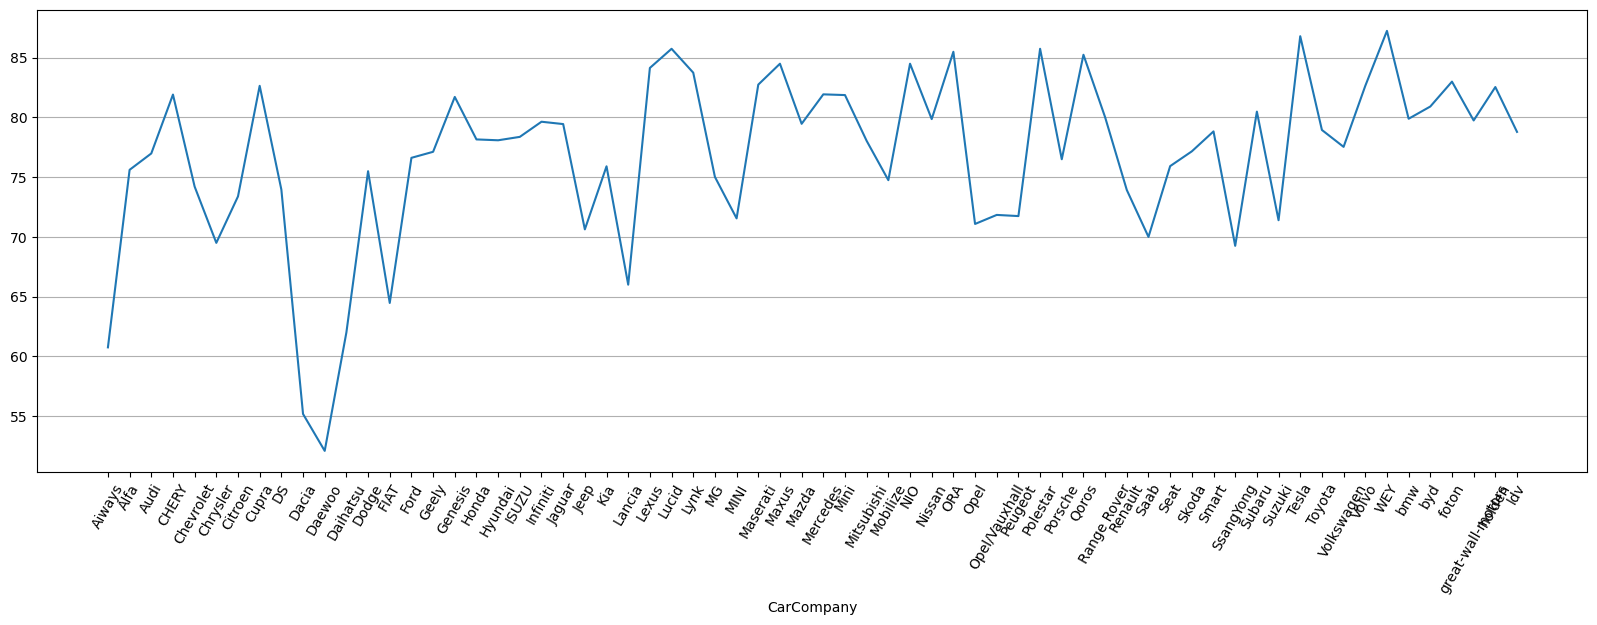

In [242]:
from sklearn.preprocessing import MinMaxScaler
# שתי דרכים שונות להציג את ממוצע המבחנים לכל חברה

scaler = MinMaxScaler(feature_range=(10, max(mean_carcomp['mean_ratings'])))
ax = All_data_copy.groupby(['CarCompany']).mean()['mean_ratings'].plot(figsize=(20, 6))
ax.set_xticks(range(len(All_data_copy.CarCompany.unique())))
ax.set_xticklabels([item for item in sorted(All_data_copy.CarCompany.unique())], rotation=60)

ax.grid(axis='y')

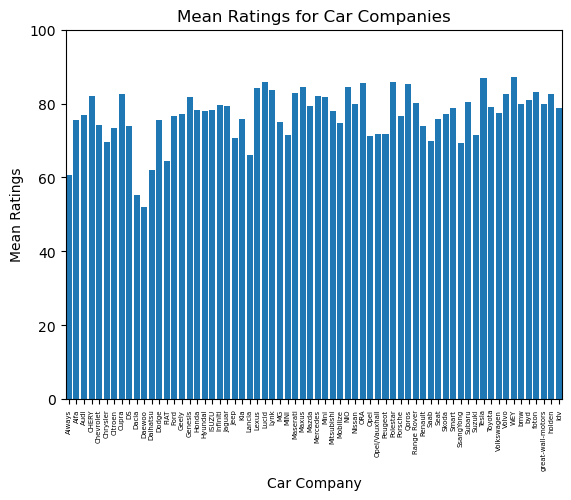

In [215]:
y=mean_carcomp['mean_ratings']
x=grouped_1[0]
plt.bar(x,y)
plt.ylim(0, 100)
plt.title('Mean Ratings for Car Companies')
plt.xlabel('Car Company')
plt.ylabel('Mean Ratings')
plt.xticks(rotation='vertical',fontsize=5)

plt.margins(0)
plt.show()

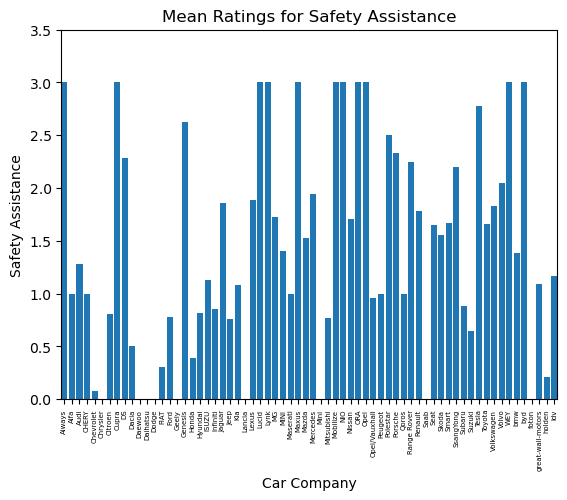

In [464]:
# ממוצע הקיום מערכות רכב למניעת תאונות על פי חברת רכב

y=mean_carcomp['sum_of_cols']
x=grouped_1[0]
plt.bar(x,y)
plt.ylim(0, 3.5)
plt.title('Mean Ratings for Safety Assistance')
plt.xlabel('Car Company')
plt.ylabel('Safety Assistance')
plt.xticks(rotation='vertical',fontsize=5)

plt.margins(0)
plt.show()

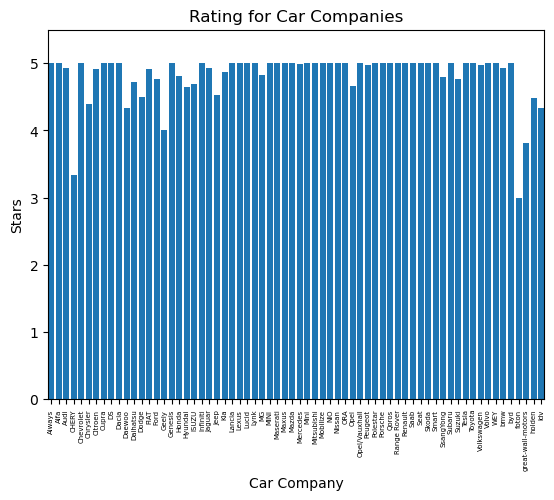

In [224]:
# הצגת ממוצע דירוג בטיחות לכל חברה

y=mean_carcomp['Stars']
x=grouped_1[0]
plt.bar(x,y)
plt.ylim(0, 5.5)
plt.title('Rating for Car Companies')
plt.xlabel('Car Company')
plt.ylabel('Stars')
plt.xticks(rotation='vertical',fontsize=5)

plt.margins(0)
plt.show()

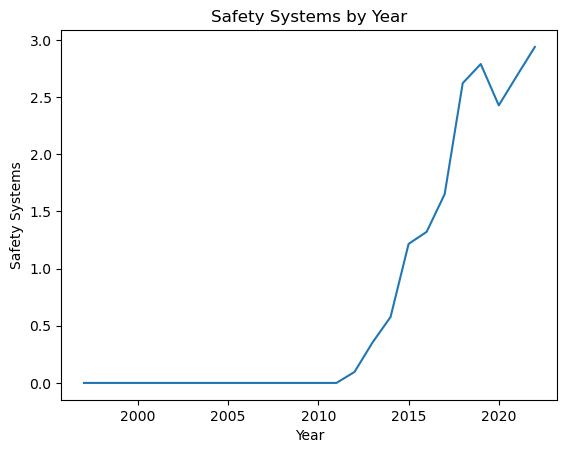

In [239]:
# הצגת העליה במערכות מיגון לרכב במהלך השנים

grouped_data = All_data_copy.groupby('YearOfPublication')['sum_of_cols'].mean()
grouped_data.plot(kind='line')

plt.title('Safety Systems by Year')
plt.xlabel('Year')
plt.ylabel('Safety Systems')
plt.show()


In [324]:
# נרמול הערכים שאנחנו רוצים לבדוק עליהם (שינוי קנה המידה של התכונות)
scaler = MinMaxScaler()
num_cols = ['Stars', 'AEBCar2Car', 'SpeedAssistance', 'LaneAssistSystem', 'AdultOccupantR', 'ChildOccupantR', 'VulnerableRoadUsersR', 'SafetyAssistR','mean_ratings' ,'sum_of_cols']
df_norm = All_data_copy.copy()
df_norm[num_cols] = scaler.fit_transform(All_data_copy[num_cols])

print(df_norm)




     CarCompany           TestedModel         VehicleType            CarClass  \
0        Aiways             Aiways U5        - 5 door SUV  Small Off-Road 4x4   
1          Alfa     Alfa Romeo Tonale        - 5 door SUV      Small Off-Road   
2          Alfa  Alfa Romeo Giulietta  - 5 door hatchback    Small Family Car   
3          Alfa    Alfa Romeo Stelvio        - 5 door SUV      Large Off-Road   
4          Alfa     Alfa Romeo Giulia     - 4 door saloon    Large Family Car   
...         ...                   ...                 ...                 ...   
1300      Volvo             Volvo C30  - 3 door hatchback    Small Family Car   
1301      Volvo             Volvo V70     - 5 door estate    Large Family Car   
1302      Volvo            Volvo XC60        - 5 door SUV      Small Off-Road   
1303        WEY         WEY Coffee 02        - 5 door SUV      Small Off-Road   
1304        WEY         WEY Coffee 01        - 5 door SUV      Large Off-Road   

     YearOfPublication Kerb

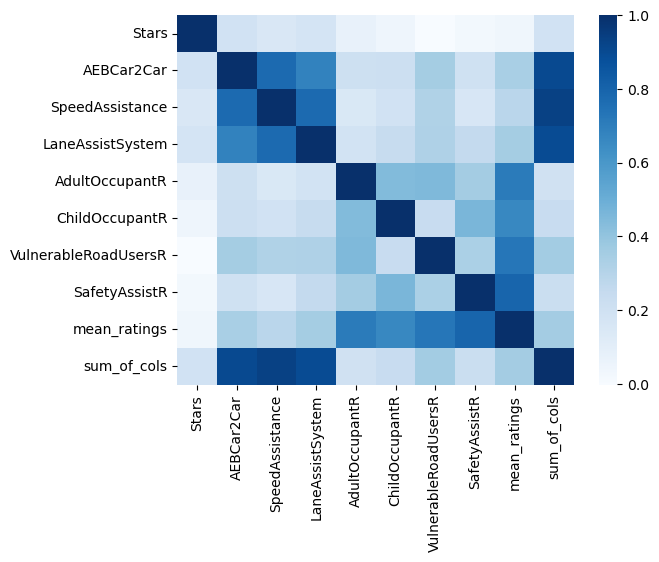

In [353]:
# יצירת גרף היט מאפ
numeric_cols = df_norm.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), cmap='Blues')

plt.show()

In [448]:
# קיטלוג כל חברה עם ערך משלה
codes, uniques = pd.factorize(All_data_copy['CarCompany'])
All_data_copy['CarCompanyCode'] = codes

grouped_codes=All_data_copy.groupby('CarCompany')
grouped_2 = pd.DataFrame(grouped_codes)
print(grouped_2[0])


0                Aiways
1                  Alfa
2                  Audi
3                 CHERY
4             Chevrolet
            ...        
61                  byd
62                foton
63    great-wall-motors
64               holden
65                  ldv
Name: 0, Length: 66, dtype: object


In [462]:
X = All_data_copy[['Stars' ,'AEBCar2Car', 'SpeedAssistance', 'LaneAssistSystem', 'AdultOccupantR', 'ChildOccupantR', 'VulnerableRoadUsersR', 'SafetyAssistR']]
X = X.astype(int)
y = All_data_copy['CarCompanyCode']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=32)

rfc = RandomForestClassifier(n_estimators=90, max_depth=30, min_samples_split=3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('predicted lables: \n', y_pred)
print('actual lables: \n', y_test.values)
print(acc)


predicted lables: 
 [12 10 10 59  9 40 10 59 40 59 62 63 63 53 18 17 18  9  8 27 18  6 39 19
 17 10 63 64  8 60 18  3  8 44 10 63 24 10  3 18 18 10 62  2 19 59  9  2
 18  3 10 18  3 52  3 19 63 40 62 18  3 10 63  9 10 63 10 55 18 19 18  2
 17  9 10 61 10  8 19 28 64 27 53 38 48 19 53 17 24 37 10  1  2 17 18  6
 10 56 24 24  8 44  8 10  2 17 24 17 48  2  2 55 38  8  3 17 24 63 56  9
  8  2 24  2 32  2 23 10 46  8 10  9 10 52 61 28 37  8 63 18 19 58 62 18
 62 58 24 24 29  2 55 55 48 10 10 27 28 37 22 53 18 10 17 19  3  8 62 56
 17  8 10 18 18 60  1  2 19 62 37 19 10  8  6  1 14 46  2 27  6  8 17 62
 62  2 19  3 63 10  2  8 27  3 46  8 23 48 40 52 46  9 24 32  8  3 28 24
 18 19 48 46 19  1 46 63 64  9 10 17 61 24  8 18  8  8 18 38  8 24 10 10
  9 10 10  3 56 27 61  2  8 62 52 27 59 27 10 18 10 27 59 19  2  8 31  3
 63 10  2  9 18 56 18 38 19 63 32  9 48 19  6 18 19  8 52 17  9 10  2 17
 22 24 26 19 24  8 19 18 61 10  9 63  6 62 63 29  8 46  3 48 48 18 32  2
 48 13 59  2 12  9  8 19  1  8 

In [457]:
clf=DecisionTreeClassifier(max_depth=30, min_samples_split=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print('predicted lables: \n',y_pred)
print('actual lables: \n', y_test.values)
print(acc)

predicted lables: 
 [14 10 40 18 31 29 10 44 19 49 18 19 18 53 18 16 18 17  8  9 18  6 63 19
 10 10 52 59 18 38 10  3  8 37  9 63 24 10  3 18 18 10  3  2 19 59 64  9
 59  3 18 18  2  8  3 19 52 63 62 22  3 17 32  9 10 63 53 63 18  9 18 18
 46  9  8  2 10  8 19 16 64 10 19 38 30 19  3 17 24 37 19  1  9 17 18 55
 10 56 24 24  8 26 14 10 44 17 26  9 48  2  2 63 38  8  3 17 24 63 56 12
  8 37 24  2 32  2 23 10 10  8 10 62 10 10 32  2 37 63 18  3 52 12 29 18
 62 22 24 24 29  9  2 39 48  5 10 27 29 37 19 19 18 18 17 50  3 18 59 17
  9  8 48 18 18 19  1 50 19 62 41 53 10  8  7  1 10 26  2 27 19  8 10 62
 62  2 19  3 22 10  2 56 18  3 18  8 23 48 38 56 40 39 24 18  8  3 28 24
 18 19 22 46 19  1 46 37 64  9 17 63 61 24  8 18  8  8 38 38  8 24 10 10
 10 10  2  3 56 27 61  2  9 38  8 19  8 27 10 18 10 27 44 19 11  8  9 16
  3 10  2  9 18 56 18 38 64 63 41  9 48 19 32  8  9  8 29 12  9 10 18 17
 37 24 26 10 24  8 19 18  2 10  8 53  6  3 63 29  8 41  3 19 48 18 62 32
 48 13  2  2 14 31  8 19  1  8 